#CARGA DE DATOS

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

features_path = 'training_set_features.csv'
labels_path = 'training_set_labels.csv'


features_df = pd.read_csv(features_path)
labels_df = pd.read_csv(labels_path)


data_df = pd.merge(features_df, labels_df, on='respondent_id')

data_df.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


#ANÁLISIS DE VALORES FALTANTES

In [5]:
missing_values = data_df.isnull().sum()
missing_percentage = (missing_values / len(data_df)) * 100

missing_df = pd.DataFrame({'Number Missing': missing_values, 'Percentage': missing_percentage})
missing_df_sorted = missing_df[missing_df['Number Missing'] > 0].sort_values(by='Percentage', ascending=False)

missing_df_sorted

,Number Missing,Percentage
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


El análisis de valores faltantes revela que varias características tienen una cantidad significativa de datos faltantes, con employment_occupation, employment_industry, y health_insurance encabezando la lista con más del 45% de valores faltantes en algunos casos. No podemos tener en cuenta estos valores.

DESCRIPTIVAS

In [13]:
# Estadísticas descriptivas para variables numéricas
desc_stats = data_df.describe(include=[np.number])  # Solo incluye variables numéricas
desc_stats.transpose()


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


* h1n1_concern: La mayoría de los encuestados están algo preocupados por el H1N1, con una media de 2.
* h1n1_knowledge: Hay un nivel de conocimiento moderado sobre el H1N1 entre los encuestados, con una media de 1 (un poco de conocimiento).
* behavioral_antiviral_meds: Muy pocos encuestados han tomado medicamentos antivirales, lo que se refleja en una media cercana a 0.
* opinion_h1n1_vacc_effective y opinion_seas_vacc_effective: Las opiniones sobre la efectividad de las vacunas tienden a ser positivas, con una media de 4, indicando que la mayoría de los encuestados las consideran algo efectivas o muy efectivas.
* household_adults y household_children: La cantidad de adultos y niños en los hogares varía, con una tendencia a tener 1 adulto y ningún niño como los valores más comunes.
* h1n1_vaccine y seasonal_vaccine: Un 21.2% de los encuestados recibieron la vacuna H1N1, mientras que un 46.6% recibieron la vacuna estacional, lo que indica una mayor aceptación de la vacuna estacional.

# DISTRIBUCIÓN

<ipython-input-12-55c94c507228>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_df['h1n1_concern'].dropna(), kde=False, ax=ax[0], bins=4, palette="viridis")
<ipython-input-12-55c94c507228>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_df['h1n1_knowledge'].dropna(), kde=False, ax=ax[1], bins=3, palette="viridis")
<ipython-input-12-55c94c507228>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_df['opinion_h1n1_vacc_effective'].dropna(), kde=False, ax=ax[2], bins=5, palette="viridis")


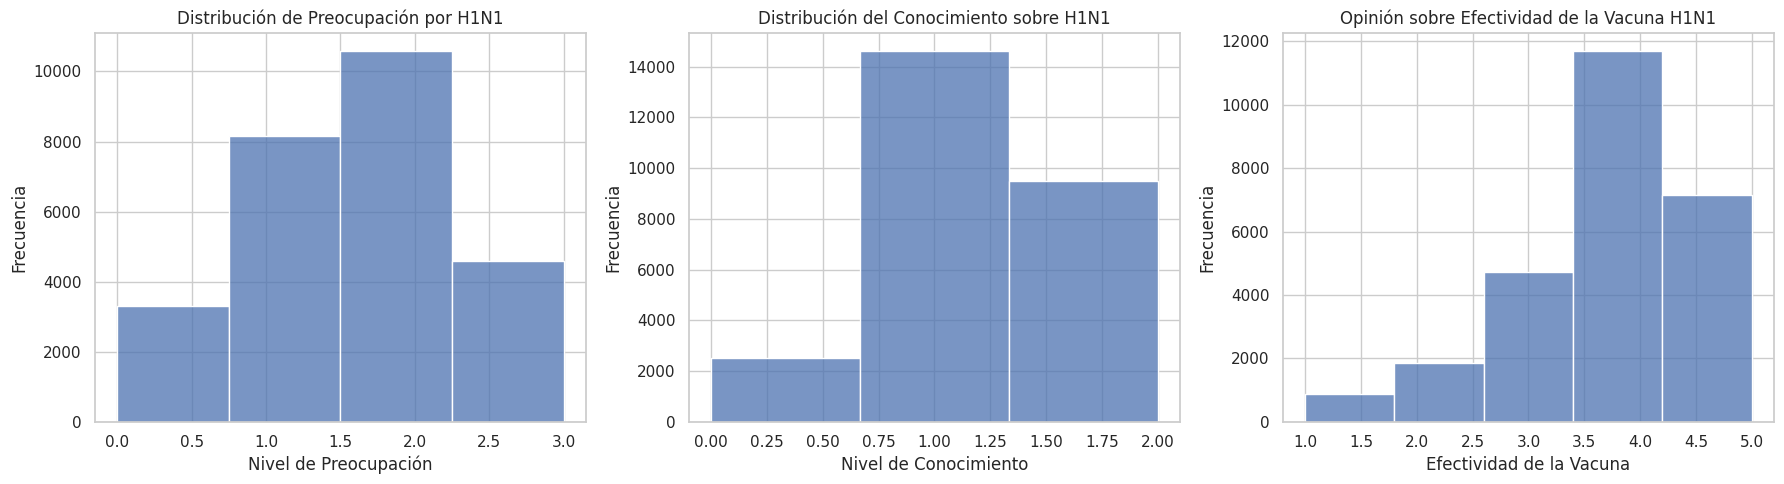

In [12]:

sns.set(style="whitegrid")


fig, ax = plt.subplots(1, 3, figsize=(18, 5))


sns.histplot(data_df['h1n1_concern'].dropna(), kde=False, ax=ax[0], bins=4, palette="viridis")
ax[0].set_title('Distribución de Preocupación por H1N1')
ax[0].set_xlabel('Nivel de Preocupación')
ax[0].set_ylabel('Frecuencia')


sns.histplot(data_df['h1n1_knowledge'].dropna(), kde=False, ax=ax[1], bins=3, palette="viridis")
ax[1].set_title('Distribución del Conocimiento sobre H1N1')
ax[1].set_xlabel('Nivel de Conocimiento')
ax[1].set_ylabel('Frecuencia')


sns.histplot(data_df['opinion_h1n1_vacc_effective'].dropna(), kde=False, ax=ax[2], bins=5, palette="viridis")
ax[2].set_title('Opinión sobre Efectividad de la Vacuna H1N1')
ax[2].set_xlabel('Efectividad de la Vacuna')
ax[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


* Distribución de Preocupación por H1N1: La mayoría de los encuestados se encuentran entre "no muy preocupados" y "algo preocupados", con una distribución relativamente uniforme.
* Distribución del Conocimiento sobre H1N1: La mayoría de los encuestados tienen "un poco de conocimiento" sobre el H1N1, con una cantidad menor de encuestados que tienen "mucho conocimiento".
* Opinión sobre Efectividad de la Vacuna H1N1: Las opiniones tienden a ser positivas, con la mayoría de los encuestados creyendo que la vacuna es "algo efectiva" o "muy efectiva".
Estas visualizaciones nos ayudan a entender las actitudes y comportamientos de los encuestados.

# COORELACIÓN PARA DESCARTAR DATOS

<ipython-input-14-5456fb03eaaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_df.corr()


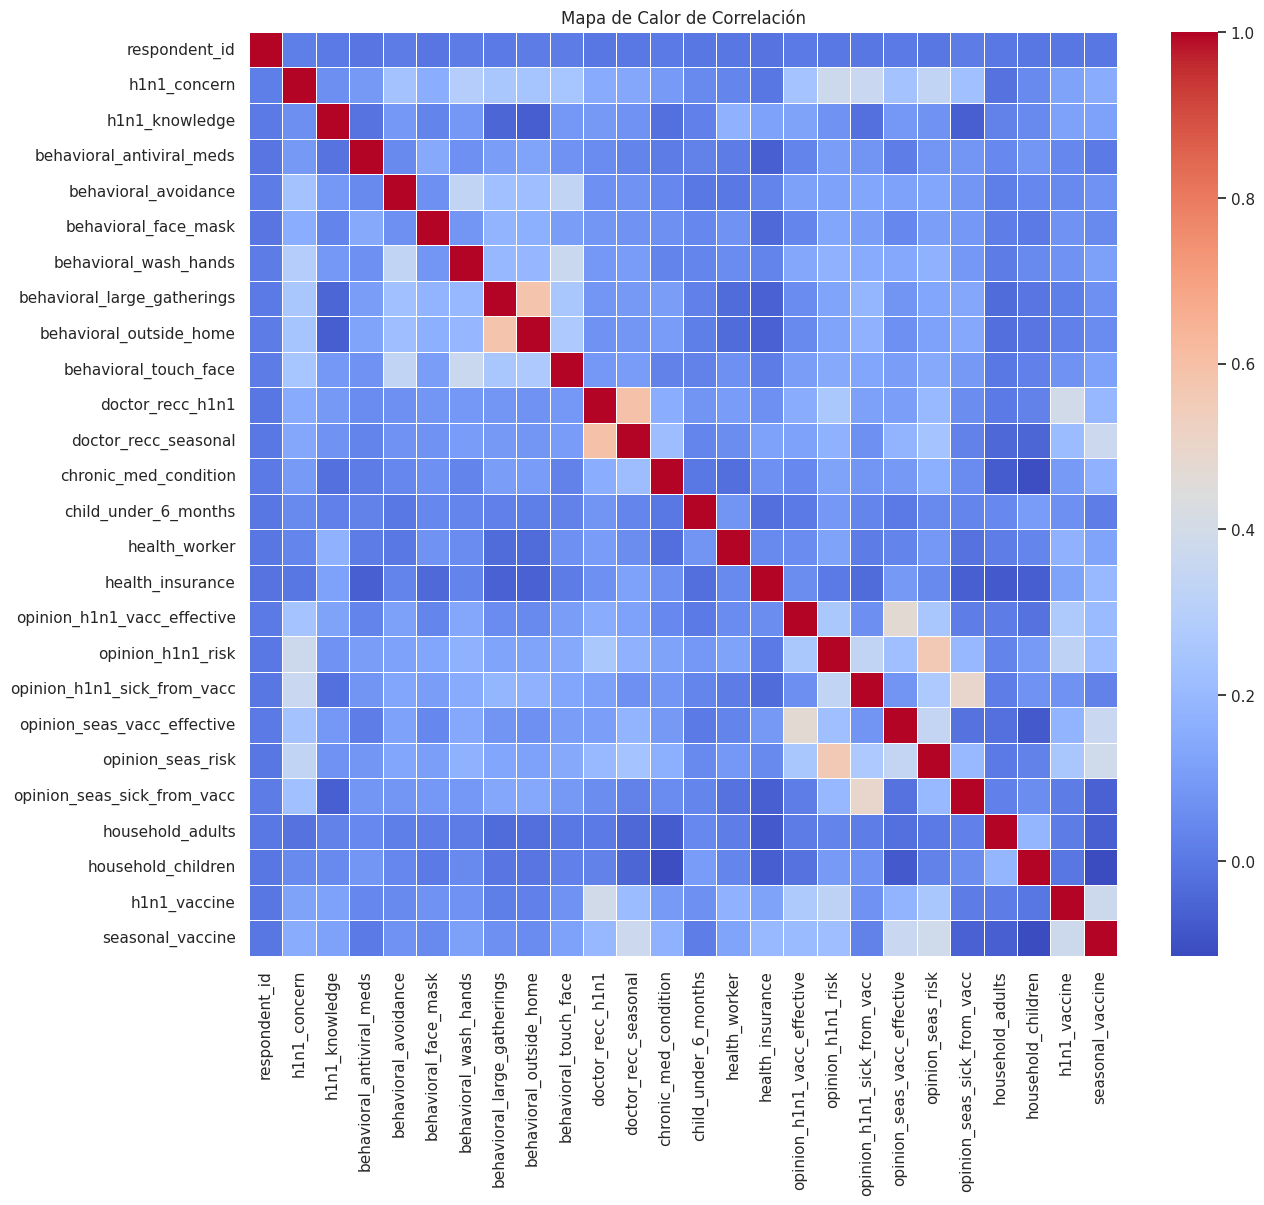

In [14]:

correlation_matrix = data_df.corr()


plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()


# PREPROCESAMIENTO

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_columns = data_df.select_dtypes(include=['float64', 'int64']).columns.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])
cat_columns = data_df.select_dtypes(include=['object']).columns


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])

X = data_df.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = data_df[['h1n1_vaccine', 'seasonal_vaccine']]

X_preprocessed = preprocessor.fit_transform(X)

# Vista previa del resultado del preprocesamiento
X_preprocessed.shape


(26707, 105)

* Para las variables numéricas y binarias, hemos imputado los valores faltantes con la mediana.
* Para las variables categóricas, utilizamos la categoría más frecuente para imputar los valores faltantes, asegurando que las observaciones con datos faltantes se traten de una manera que refleje la distribución más común de los datos.
* Aplicamos la codificación One-Hot a las variables categóricas, transformándolas en columnas binarias para cada categoría.
* Se escaló el conjunto de datos usando la normalización Min-Max, que ajusta los valores en un rango entre 0 y 1. Esto es particularmente útil para modelos que son sensibles a la magnitud de las variables, como la regresión logística o los modelos basados en gradientes.

# MODELO

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


results = []


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}


for name, model in models.items():
    model.fit(X_train, y_train['h1n1_vaccine'])
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test['h1n1_vaccine'], y_pred_proba)
    results.append((name, roc_auc))


result_ordenado = sorted(results, key=lambda x: x[1], reverse=True)

result_ordenado


[('Gradient Boosting', 0.838986692047164),
 ('Logistic Regression', 0.8313497466152333),
 ('Random Forest', 0.8295593500239519),
 ('Support Vector Machine', 0.8174203077595408),
 ('Naive Bayes', 0.7096010975804486),
 ('Decision Tree', 0.6425461597290505)]

# OPTIMIZACIÓN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5,
                                   verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train['h1n1_vaccine'])


print("Mejores hiperparámetros:", random_search.best_params_)


best_model = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
